# Hands On with Simple Linear Regression
## Goal for practice
### 1. Perform simple linear regression with SKlearn
### 2. Use model performance metrics to evaluate model performance
### 3. Perform residule diagnostic and decide proper preprocessing before fitting the model
### 4. Implement SLR with gradient descent algorithm

We have learnt Simple(SLR) Linear Regression, let's use some data to do some hands on work. The data provided is a synthesized data let's fit model with sklearn

#### Load important library

In [14]:
import pandas as pd  
import numpy as np  
import os
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [15]:
path="slr"
data1b = "train.csv"
data1t = "test.csv"
data2b = "train2.csv"
data2t = "test2.csv"
data3b = "train3.csv"
data3t = "test3.csv"
print(os.path.join(path, data1b))

slr/train.csv


# Read Data

In [16]:
dt1b = pd.read_csv(os.path.join(path, data1b))
dt1t = pd.read_csv(os.path.join(path, data1t))

In [17]:
dt1b.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


Text(0, 0.5, 'y')

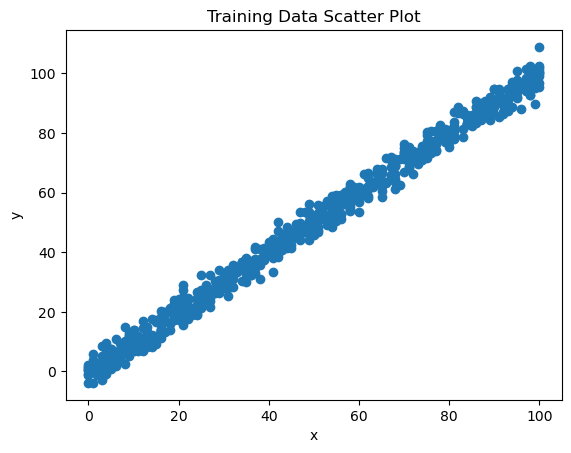

In [18]:
plt.scatter((dt1b['x']),dt1b['y']);
plt.title("Training Data Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

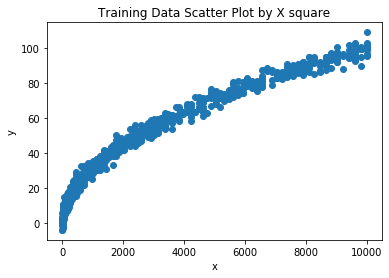

In [6]:
plt.scatter((dt1b['x']*dt1b['x']),dt1b['y']);
plt.title("Training Data Scatter Plot by X square")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

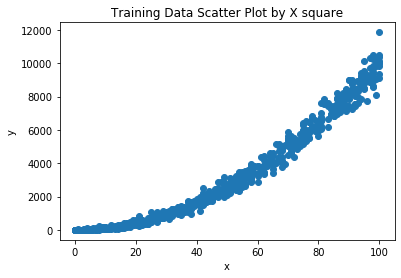

In [7]:
plt.scatter((dt1b['x']),dt1b['y']*dt1b['y']);
plt.title("Training Data Scatter Plot by X square")
plt.xlabel("x")
plt.ylabel("y")

#### Make synthetic data for X and Y transformation practice purpose

In [8]:
dt2b=dt1b.copy()
dt2t=dt1t.copy()
dt3b=dt1b.copy()
dt3t=dt1t.copy()

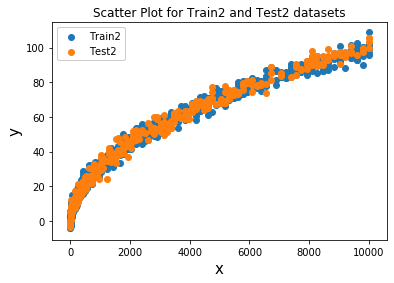

In [9]:
dt2b['x'] = dt1b['x']*dt1b['x']
dt2t['x'] = dt1t['x']*dt1t['x']

plt.scatter((dt2b['x']),dt2b['y'], label="Train2")
plt.title("Scatter Plot for Train2 and Test2 datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt2t['x']),dt2t['y'], label="Test2")

plt.legend(framealpha=1, frameon=True)

In [10]:
dt2b.to_csv(os.path.join(path, data2b), index = None, header=True)
dt2t.to_csv(os.path.join(path, data2t), index = None, header=True)

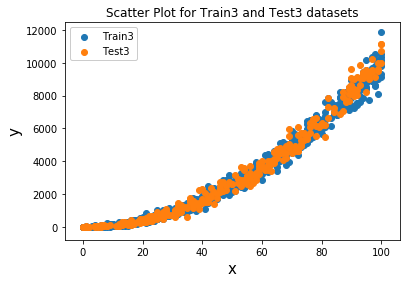

In [11]:
dt3b['y'] = dt1b['y']*dt1b['y']
dt3t['y'] = dt1t['y']*dt1t['y']

plt.scatter((dt3b['x']),dt3b['y'], label="Train3")
plt.title("Scatter Plot for Train3 and Test3 datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt3t['x']),dt3t['y'], label="Test3")

plt.legend(framealpha=1, frameon=True)

In [12]:
dt3b.to_csv(os.path.join(path, data3b), index = None, header=True)
dt3t.to_csv(os.path.join(path, data3t), index = None, header=True)

# Practice 1 - Use "train.csv" and "test.csv" build simple linear model 

### Check data quality and scatter plot
#### 1 - head
#### 2 - check null
#### 3 - scatter plot
#### 4 - Train model with model evaluation
#### 5 - check residual plot and diagnostics

In [13]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [14]:
dt1b.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [15]:
dt1t.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [16]:
dt1b.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [17]:
dt1t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [18]:
print("Train data misscnt: {}".format(dt1b.isnull().sum()))
print("Test data misscnt: {}".format(dt1t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


Noticed train data have a missing y , we have to remove the missing value before fit model, 
otherwise you will get error message. Dropna and double check the missing row was removed

In [19]:
dt1b = dt1b.dropna().copy()
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


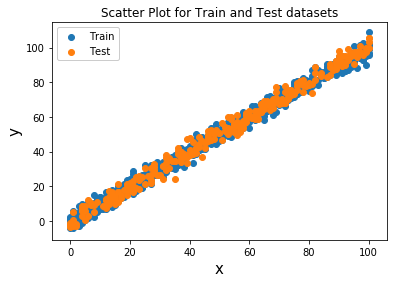

In [20]:
plt.scatter((dt1b['x']),dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

We retrieve the independent(x) and dependent(y) variables and since we have only one feature(x) 
we reshape them so that we could feed them into our linear regression model.

In [24]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

Fit model and get the intercept and coefficent

In [22]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9888014444327563
9.43292219203931


In [23]:
print("intercept: {}".format(reg.intercept_))

intercept: -0.10726546430095851


In [24]:
print("coeffcient: {}".format(reg.coef_))

coeffcient: [1.00065638]


Therefore the fitted line : y = -0.10726546430095851 + 1.00065638*x

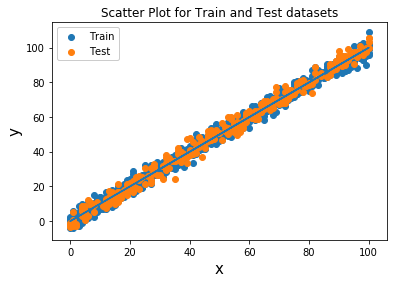

In [25]:
plt.scatter(dt1b['x'],dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt1b['x'], (-0.10726546430095851 + 1.00065638*dt1b['x']))

How about build sample residual?

In [26]:
y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b

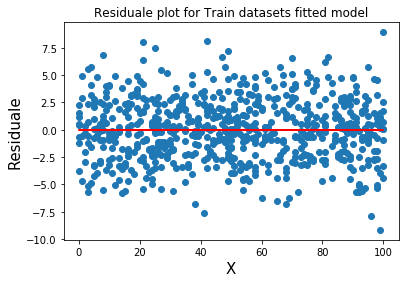

In [27]:
plt.scatter((dt1b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt1b['x'], 0*dt1b['x'], color="r")

Residule distributed around zero randomly, the model fit is adequate 

# Practice 2 - Use "train2.csv" and "test2.csv" build simple linear model, did you observe any special trends? How to improve the model fit

In [28]:
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [29]:
dt2b.head()

,x,y
0,576.0,21.549452
1,2500.0,47.464463
2,225.0,17.218656
3,1444.0,36.586398
4,7569.0,87.288984


In [30]:
dt2t.head()

,x,y
0,5929,79.775152
1,441,23.177279
2,484,25.609262
3,400,17.857388
4,1296,41.849864


In [31]:
dt2b.describe()

,x,y
count,7.000000e+02,699.000000
mean,2.113670e+04,49.939869
std,4.709034e+05,29.109217
min,0.000000e+00,-3.839981
25%,6.250000e+02,24.929968
50%,2.401000e+03,48.973020
75%,5.625000e+03,74.929911
max,1.246201e+07,108.871618


In [32]:
dt2t.describe()

,x,y
count,300.000000,300.000000
mean,3404.330000,51.205051
std,2996.644856,29.071481
min,0.000000,-3.467884
25%,729.000000,25.676502
50%,2809.000000,52.170557
75%,5329.000000,74.303007
max,10000.000000,105.591837


In [33]:
print("Train data misscnt: {}".format(dt2b.isnull().sum()))
print("Test data misscnt: {}".format(dt2t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


In [34]:
dt2b = dt2b.dropna().copy()
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


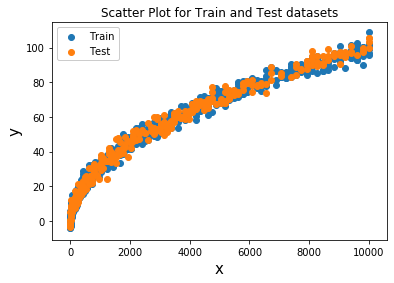

In [35]:
plt.scatter((dt2b['x']),dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt2t['x']),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

In [36]:
x_train = dt2b['x']
y_train = dt2b['y']
x_test = dt2t['x']
y_test = dt2t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [37]:
reg2 = LinearRegression(normalize=True)
reg2.fit(x_train,y_train)
y_pred = reg2.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9255137107058171
62.74232128123423


In [38]:
print("intercept: {}".format(reg2.intercept_))
print("coeffcient: {}".format(reg2.coef_))

intercept: 19.293935641609785
coeffcient: [0.00917928]


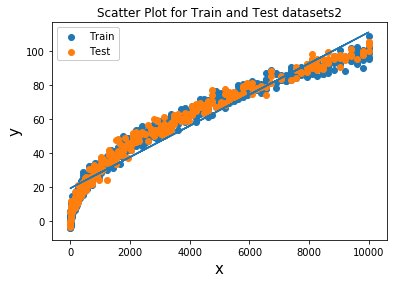

In [39]:
plt.scatter(dt2b['x'],dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets2")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt2t['x']),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt2b['x'], (reg2.intercept_ + reg2.coef_[0]*dt2b['x']))

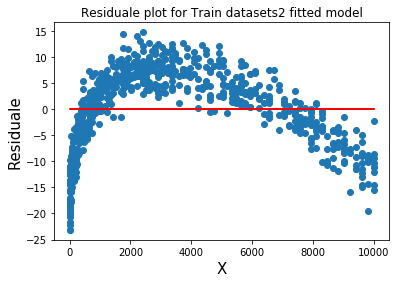

In [40]:
y_pred_b = reg2.predict(x_train)
residuale = y_train - y_pred_b

plt.scatter((dt2b['x']),residuale)
plt.title("Residuale plot for Train datasets2 fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt2b['x'], 0*dt2b['x'], color="r")

The residule plot suggested some Transform of x by sqrt transformation, then fit the model again

In [41]:
import math

x_train = np.sqrt(dt2b['x'])
y_train = dt2b['y']
x_test = np.sqrt(dt2t['x'])
y_test = dt2t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [42]:
reg22 = LinearRegression(normalize=True)
reg22.fit(x_train,y_train)
y_pred = reg22.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9888014444327563
9.43292219203931


In [43]:
print("intercept: {}".format(reg22.intercept_))
print("coeffcient: {}".format(reg22.coef_))

intercept: -0.10726546430095851
coeffcient: [1.00065638]


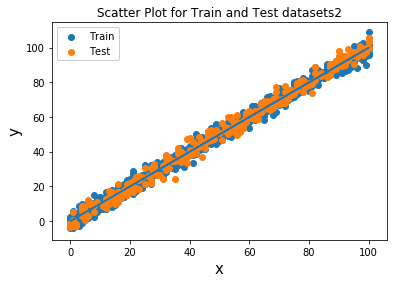

In [44]:
plt.scatter(np.sqrt(dt2b['x']),dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets2")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(np.sqrt(dt2t['x']),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(np.sqrt(dt2b['x']), (reg22.intercept_ + reg22.coef_[0]*np.sqrt(dt2b['x'])))

Replot residule with new model reg22

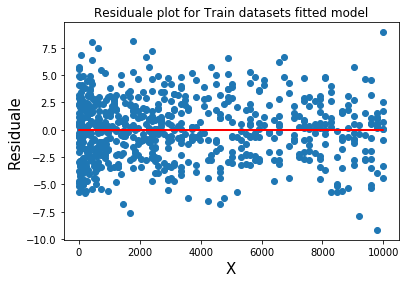

In [45]:
y_pred_b = reg22.predict(x_train)
residuale = y_train - y_pred_b

plt.scatter((dt2b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt2b['x'], 0*dt2b['x'], color="r")

Now residule looks like normal cocnstant variance

# Practice 3 - Use "train3.csv" and "test3.csv" build simple linear model, did you observe any special trends? How to improve the model fit

In [46]:
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [47]:
dt3b.head()

,x,y
0,24.0,464.378880
1,50.0,2252.875253
2,15.0,296.482126
3,38.0,1338.564521
4,87.0,7619.366709


In [48]:
dt3t.head()

,x,y
0,77,6364.074878
1,21,537.186256
2,22,655.834278
3,20,318.886311
4,36,1751.411149


In [49]:
dt3b.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,3340.124826
std,134.681703,3055.712556
min,0.000000,0.014850
25%,25.000000,621.515765
50%,49.000000,2398.356724
75%,75.000000,5614.501316
max,3530.157369,11853.029271


In [50]:
dt3t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,3464.291087
std,28.504286,3082.356336
min,0.000000,0.075794
25%,27.000000,659.283348
50%,53.000000,2721.780348
75%,73.000000,5520.944197
max,100.000000,11149.636147


In [51]:
print("Train data misscnt: {}".format(dt3b.isnull().sum()))
print("Test data misscnt: {}".format(dt3t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


In [52]:
dt3b = dt3b.dropna().copy()
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


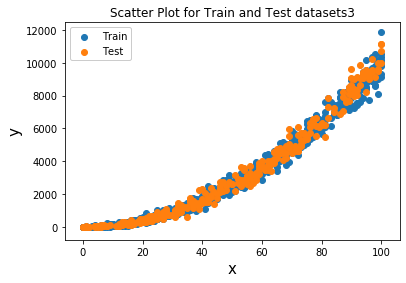

In [53]:
plt.scatter((dt3b['x']),dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets3")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt3t['x']),dt3t['y'], label="Test")
plt.legend(framealpha=1, frameon=True)

In [54]:
x_train = dt3b['x']
y_train = dt3b['y']
x_test = dt3t['x']
y_test = dt3t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [55]:
reg3 = LinearRegression(normalize=True)
reg3.fit(x_train,y_train)
y_pred = reg3.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9204524642903842
753255.5700480759


In [56]:
print("intercept: {}".format(reg3.intercept_))
print("coeffcient: {}".format(reg3.coef_))

intercept: -1743.2412867403104
coeffcient: [101.63824122]


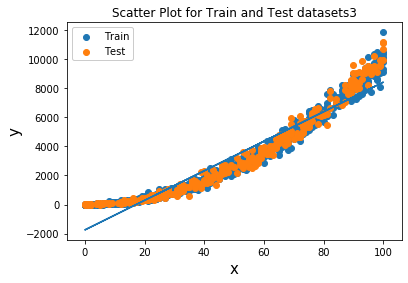

In [57]:
plt.scatter(dt3b['x'],dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets3")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(dt3t['x'],dt3t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt3b['x'], (reg3.intercept_ + reg3.coef_[0]*(dt3b['x'])))

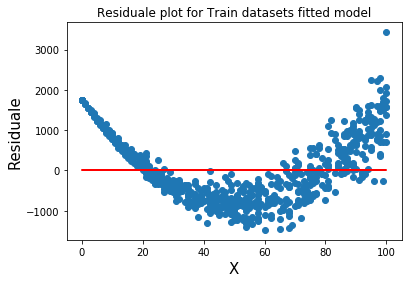

In [58]:
y_pred_b = reg3.predict(x_train)
residuale = y_train - y_pred_b

plt.scatter((dt3b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt3b['x'], 0*dt3b['x'], color="r")

Residule showed except some curve there is noconsistant variance, try transform y

In [59]:
x_train = dt3b['x']
y_train = np.sqrt(dt3b['y'])
x_test = dt3t['x']
y_test = np.sqrt(dt3t['y'])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [60]:
reg32 = LinearRegression(normalize=True)
reg32.fit(x_train,y_train)
y_pred = reg32.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9888297722460914
9.30168491168564


In [61]:
print("intercept: {}".format(reg32.intercept_))
print("coeffcient: {}".format(reg32.coef_))

intercept: 0.0813451532406475
coeffcient: [0.99785242]


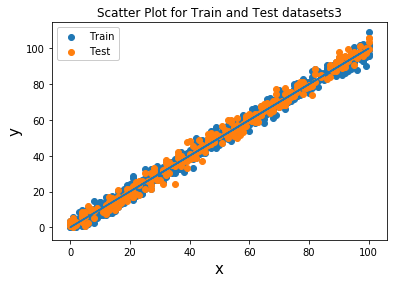

In [62]:
plt.scatter(dt3b['x'], np.sqrt(dt3b['y']), label="Train")
plt.title("Scatter Plot for Train and Test datasets3")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(dt3t['x'], np.sqrt(dt3t['y']), label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt3b['x'], (reg32.intercept_ + reg32.coef_[0]*(dt3b['x'])))

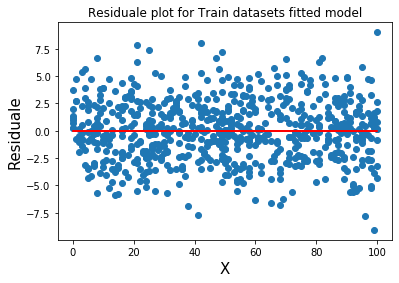

In [63]:
y_pred_b = reg32.predict(x_train)
residuale = y_train - y_pred_b

plt.scatter((dt3b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt3b['x'], 0*dt3b['x'], color="r")

Residule fixed after the Y transformation
fitted model is sqrt(y) = 0.9888297722460914 + 9.30168491168564*x

# Practice 4 - Can you implement simple linear regression model in practice1 from scratch by yourself, using gradient descent?

In [28]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


In [29]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train).reshape(699,1)
y_train = np.array(y_train).reshape(699,1)
x_test = np.array(x_test).reshape(300,1)
y_test = np.array(y_test).reshape(300,1)

### Train steps:
#### 0 - Initiate parameters
#### 1 - Calculate prediction based on temp parameters and equation 
#### 2 - Calc. cost
#### 3 - Calc. Gradient
#### 4 - Update Parameter
#### 5 - loop 1-4 to reach min cost
#### 6 - earlier stop to end loop if minimal alrrady reached

In [30]:
def get_pred(x_train, parameters):
    b1 = parameters['b1']
    b0 = parameters['b0']
    predictions = np.multiply(b1, x_train) + b0
    return predictions

def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2) * 0.5
    return cost

def deriv(x_train, y_train, predictions):
    derivatives = dict()
    df = (y_train - predictions) * -1
    db1 = np.mean(np.multiply(x_train, df))
    db0 = np.mean(df)
    derivatives['db1'] = db1
    derivatives['db0'] = db0
    return derivatives

def update_parameters(parameters, derivatives, learning_rate):
    parameters['b1'] = parameters['b1'] - learning_rate * derivatives['db1']
    parameters['b0'] = parameters['b0'] - learning_rate * derivatives['db0']
    return parameters

In [31]:
def train(x_train, y_train, learning_rate, iters = 10):
    #random parameters
    parameters = dict()
    parameters["b1"] = np.random.uniform(0,1) * -1
    parameters["b0"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #predition
        predictions = get_pred(x_train, parameters)
        
        #cost function
        cost = cost_function(predictions, y_train)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        plt.plot(x_train, y_train, 'x')
        plt.plot(x_train, predictions, 'o')
        plt.show()
        
        #gradeint/partial derivatives
        derivatives = deriv(x_train, y_train, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

### Training

Iteration = 1, Loss = 6637.942803197159


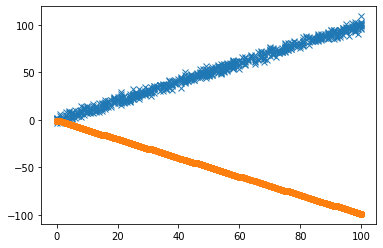

Iteration = 2, Loss = 2947.0960228088843


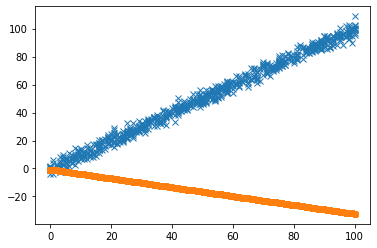

Iteration = 3, Loss = 1309.6778897758143


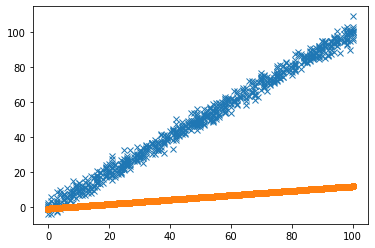

Iteration = 4, Loss = 583.2488871380831


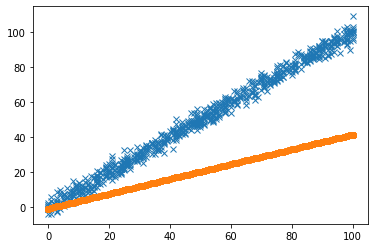

Iteration = 5, Loss = 260.97378425598737


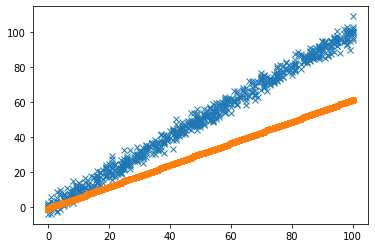

Iteration = 6, Loss = 117.99870728840864


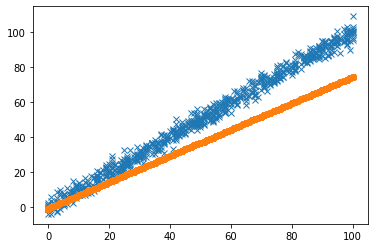

Iteration = 7, Loss = 54.56882167591001


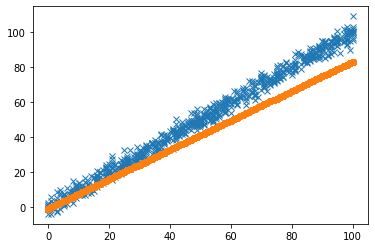

Iteration = 8, Loss = 26.428598936860812


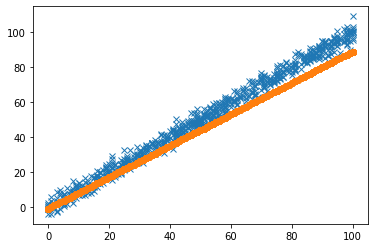

Iteration = 9, Loss = 13.944386127639142


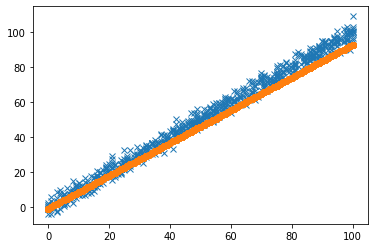

Iteration = 10, Loss = 8.405851654970515


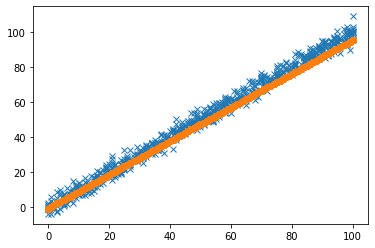

Iteration = 11, Loss = 5.948718367646616


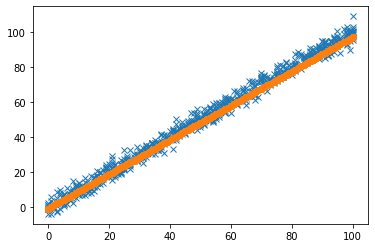

Iteration = 12, Loss = 4.858626973894732


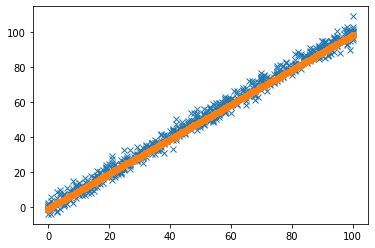

Iteration = 13, Loss = 4.3750140704485805


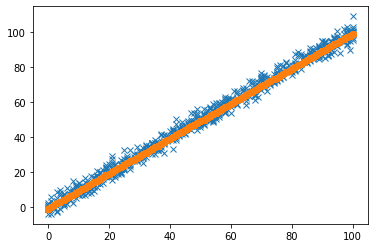

Iteration = 14, Loss = 4.160461069988615


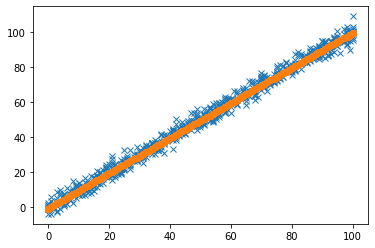

Iteration = 15, Loss = 4.065274597077941


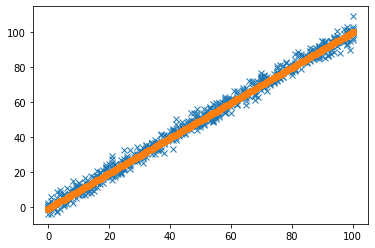

Iteration = 16, Loss = 4.023044241941249


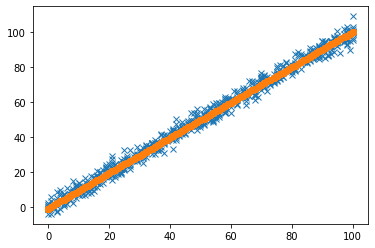

Iteration = 17, Loss = 4.004307494873946


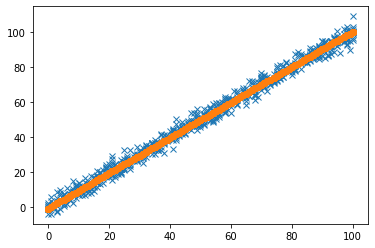

Iteration = 18, Loss = 3.995993521333214


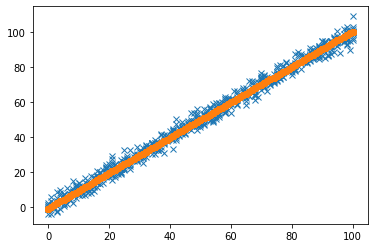

Iteration = 19, Loss = 3.9923035378020066


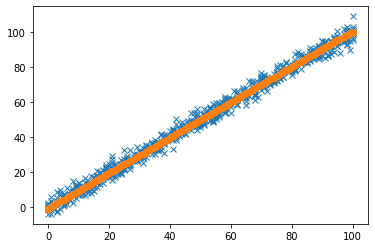

Iteration = 20, Loss = 3.990664954889233


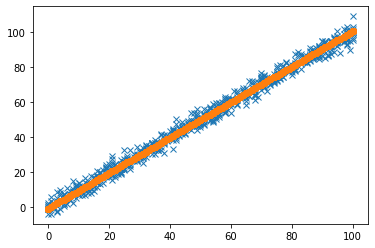

In [68]:
parameters,loss = train(x_train, y_train, 0.0001, 20)

##### More improvement to implement earlier stop

### Final result and validation

In [69]:
print("Fitted Model: Y = {} + {} * X".format(parameters["b0"], parameters["b1"]))

Fitted Model: Y = -0.7724933623232058 + 1.0100338816506569 * X


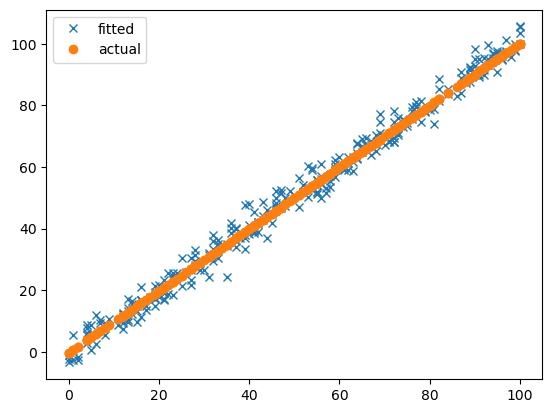

In [36]:
valid_predictions = get_pred(x_test, parameters)
plt.figure()
plt.plot(x_test, y_test, 'x', label='fitted')
plt.plot(x_test, valid_predictions, 'o', label='actual')
plt.legend()

In [37]:
#cost for valid dataset
cost_test = cost_function(valid_predictions, y_test)
print("Loss_test = {}".format(cost_test))
print("Loss_train = {}".format(min(loss)))

Loss_test = 4.7209169530085235
Loss_train = 3.9412904477740756
